(120,)


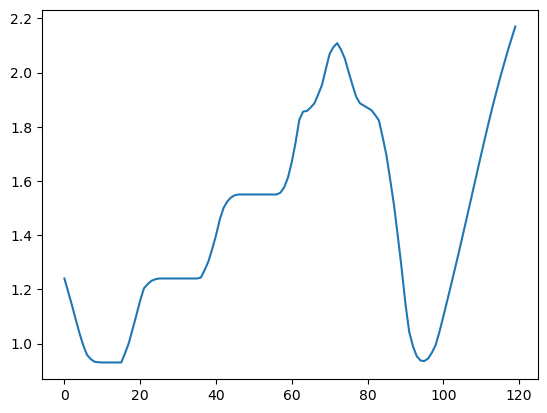

In [10]:
import numpy as np
import glob
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
files = glob.glob('D:\\!BraVa_src\\src\\ModeDecomposition\\scaling\\resamp_attr_ascii\\vmtk64a\\*.vtk')
# print (files)

radii = []

def interpolate_maximum_inscribed_sphere_radius(values, num_points):
    x_original = np.linspace(0, 1, len(values))
    x_new = np.linspace(0, 1, num_points)
    
    interpolator = interp1d(x_original, values, kind='linear')
    interpolated_values = interpolator(x_new)
    
    return interpolated_values

# Example usage: interpolate to 100 points
num_interpolated_points = 100
interpolated_radii = interpolate_maximum_inscribed_sphere_radius(max_inscribed_sphere_radii, num_interpolated_points)
interpolated_radii


def extract_maximum_inscribed_sphere_radius(vtk_file_path):
    with open(vtk_file_path, "r") as file:
        lines = file.readlines()

    data_start = False
    values = []

    for line in lines:
        if "SCALARS MaximumInscribedSphereRadius" in line:
            data_start = True
            continue
        if data_start:
            if "LOOKUP_TABLE" in line:
                continue
            if any(c.isalpha() for c in line):  # Stop when encountering a non-numeric line
                break
            values.extend(map(float, line.split()))

    return np.array(values)

# Extract the values
for i in range(len(files)):
    max_inscribed_sphere_radii = extract_maximum_inscribed_sphere_radius(files[0])
    radii.append(interpolate_maximum_inscribed_sphere_radius(max_inscribed_sphere_radii, 120))

print (np.mean(radii, axis=0).shape)

plt.plot(np.mean(radii, axis=0))
plt.show()

np.savetxt('./mean_radius.txt', np.mean(radii, axis=0), delimiter=' ')